# DS Assignment 4: MLE and Hypothesis Testing
# Nilesh Sonune | 16D070004

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
data.head(10)

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160
5,5,0.144288
6,6,0.306511
7,7,0.535743
8,8,1.607578
9,9,1.338186


# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [3]:
def pdf_exp(lambd,x):
    return lambd * np.exp(-1*lambd*x)

likelihood_1 = 1
likelihood_2 = 1

for val in data[1].values:
    likelihood_1 = likelihood_1 * pdf_exp(x = val,lambd=1)
    likelihood_2 = likelihood_2 * pdf_exp(x = val,lambd=2)

log_likelihood_1 = np.log(likelihood_1)
log_likelihood_2 = np.log(likelihood_2)

print(log_likelihood_1) 
print(log_likelihood_2)

-48.94830108538966
-28.581884114784785


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [4]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)
print(sample1.head(10))
print(sample2.head(10))

   0         1
0  0 -0.179278
1  1  0.236714
2  2  0.255502
3  3 -0.029321
4  4  0.004818
5  5 -0.027196
6  6  0.115886
7  7  0.081445
8  8 -0.074315
9  9  0.377067
   0         1
0  0  0.680541
1  1  0.436810
2  2  0.604089
3  3  0.518702
4  4  0.479711
5  5  0.471884
6  6  0.432055
7  7  0.588883
8  8  0.421044
9  9  0.361212


Find the parameters required to compute the T statistic

In [5]:
significance = 0.01
mu1 = np.mean(sample1[1].values)
mu2 = np.mean(sample2[1].values)

s1 = np.var(sample1[1].values)
s2 = np.var(sample2[1].values)

n1 = sample1[1].shape[0]
n2 = sample2[1].shape[0]

print('mu1: {}, mu2: {}, s1: {}, s2: {}, n1: {}, n2: {}'.format(round(mu1,3), round(mu2,3), round(s1,3), round(s2,3), n1, n2))

mu1: 0.046, mu2: 0.501, s1: 0.052, s2: 0.01, n1: 100, n2: 50


Find the degrees of freedom to get the critical value

In [6]:
T = (mu1 - mu2) / np.sqrt((s1/n1) + (s2/n2))
deg_freedom = n1 + n2 -2

print('T: {}, deg_freedom: {}'.format(abs(T), deg_freedom))

T: 16.930142459567165, deg_freedom: 148


Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [7]:
critical_value = stats.t.pdf((1-significance)/2, deg_freedom)
print('T : {}, Critical Value : {}'.format(np.abs(T), critical_value))
if np.abs(T) > critical_value:
    print('YES') # Null Hypothesis is rejected
else:
    print('NO') # Null Hypothesis is not rejected

T : 16.930142459567165, Critical Value : 0.35209086068513945
YES


Plot the distribution of both the samples to visualize

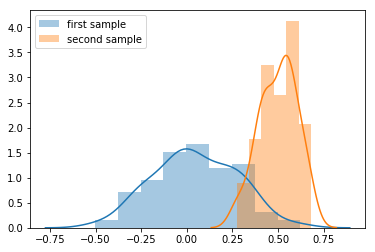

In [8]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()

# It can be clearly observed that both distributions are completely different